In [1]:
import os
import sys
import numpy as np 
import scipy 
import pdb
import matplotlib.pyplot as plt

In [2]:
sys.path.append('/home/akumar/nse/uoicorr')

In [3]:
from utils import gen_covariance 

In [4]:
# First thing to understand: Does the final result, in the form of A.S, actually perform better when 
# correlations are present?

In [5]:
def error_bound(X, Sigma, subset, delta, sigma_beta_sq, sigma_sq):
    
    normalization = 1/np.power(2 * np.pi * np.linalg.det(Sigma), (1 + delta)/2)
    
    gaussian_weight = normalization * np.exp(-1/2 * X.T @ np.lianlg.inv(Sigma) @ X * 1/(1 + delta))
    error_expression = (1 + sigma_beta_sq * X[subset].T @ X[subset]/((1 + delta) * sigma_sq))**(-delta/2)
    
    return error_expression * gaussian_weight

In [6]:
def error_expression(X, subset, delta, sigma_beta_sq, sigma_sq):
    error_expression = (1 + sigma_beta_sq * X[subset].T @ X[subset]/((1 + delta) * sigma_sq))**(-delta/2)
    return error_expression

In [10]:
# Numerically integrate the error expression
delta = 0.5

# In the first case, keep things I.I.D
n_features = 100
nsamples = int(1e6)
sparsity = 0.25
# Choose a fixed support subset 
support = np.arange(n_features)[:int(n_features * sparsity)]

# Modulate exponential falloff length and observe the resulting value of the integral
L = [0.01, 0.5, 1, 2, 3, 4, 5, 10, 20, 50]
I = np.zeros(len(L))
int_error = np.zeros(len(L))
for i, ll in enumerate(L):
    print('L: %f' % ll)
    Sigma = gen_covariance(n_features, 0, n_features, ll, 1) * (1 + delta)    
    
    # Draw sample:
    X = np.random.multivariate_normal(mean=np.zeros(n_features), cov=Sigma, size=nsamples)
    # Calculate error expression
    I[i] = 1/nsamples * np.sum([error_expression(X[i, :], support, 0.5, 1, 1) for i in range(nsamples)])

    # Determine the error bound
    I2 = 1/nsamples * np.sum([error_expression(X[i, :]**2, support, 0.5, 1, 1) for i in range(nsamples)])
    int_error[i] = (I2 - I[i]**2)/np.sqrt(nsamples)
    

L: 0.010000
L: 0.500000
L: 1.000000
L: 2.000000
L: 3.000000
L: 4.000000
L: 5.000000
L: 10.000000
L: 20.000000
L: 50.000000


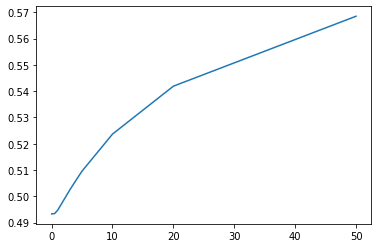

In [11]:
plt.plot(L, I)

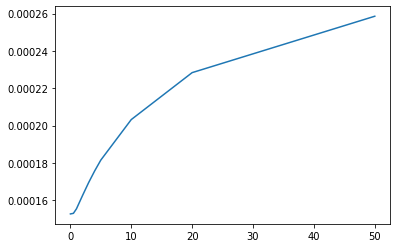

In [12]:
plt.plot(L, int_error)

In [15]:
def error_expression2(X, subset, delta, sigma_beta_sq, sigma_sq):
    error_expression = (1 + sigma_beta_sq * X[subset].T @ X[subset]/((1 + delta) * sigma_sq))
    return error_expression

In [16]:
# What happens when we do the same thing with the upper bound?
# Numerically integrate the error expression
# In the first case, keep things I.I.D
n_features = 100
nsamples = int(1e6)
sparsity = 0.25
# Choose a fixed support subset 
support = np.arange(n_features)[:int(n_features * sparsity)]

# Modulate exponential falloff length and observe the resulting value of the integral
L = [0.01, 0.5, 1, 2, 3, 4, 5, 10, 20, 50]
I_ = np.zeros(len(L))
int_error = np.zeros(len(L))
for i, ll in enumerate(L):
    print('L: %f' % ll)
    Sigma = gen_covariance(n_features, 0, n_features, ll, 1)    
    
    # Draw sample:
    X = np.random.multivariate_normal(mean=np.zeros(n_features), cov=Sigma, size=nsamples)
    # Calculate error expression
    I_[i] = 1/nsamples * np.sum([error_expression2(X[i, :], support, 0.5, 1, 1) for i in range(nsamples)])**(-1/2)    

L: 0.010000
L: 0.500000
L: 1.000000
L: 2.000000
L: 3.000000
L: 4.000000
L: 5.000000
L: 10.000000
L: 20.000000
L: 50.000000


In [ ]:
# Compare to the analytic expression